<h1><center>Hello</center></h1>


The purpose of this demo is to walk the user through the pipeline of the Synthesized's tool.



This is a read-only version. To schedule an exeonline demo with a preferred dataset, please contact our team at team@synthesized.io

<h1><center>About Synthesized</center></h1>


Synthesized unleashes the potential of commercial data by addressing compliance and technological hurdles that hinder data processing. Their software is an environment-deployable learning engine that can be exported off-network and generate synthetic data based on relationships learned whilst the engine was on-network against a real data source. 

__Business needs__
* Procure new technologies
* Test software products across borders with sensitive data	
* Conduct exploratory analysis and feature engineering across teams	
* Train many machine learning systems securely on sensitive data	
* Train complex models on large volumes of data in a cloud/remote location	
* Test complex systems against adversarial examples



<h1><center>Pipeline Diagram</center></h1>



![title](img/synth.png)

Synthetic data mimics original data and is privacy complaint by design. It can be safely accessed within enterprises, stored in the cloud or shared with 3rd parties.

The entire pipeline can be broken down into 4 parts:
1. __Load data into the engine__ 
2. __Run engine and generate synthetic data__
3. __Start generating value for your business__

<h1><center>1. Load Data</center></h1>



In [2]:
import os
import warnings
import pandas as pd

warnings.filterwarnings(action='ignore', message='numpy.dtype size changed')
warnings.filterwarnings(action='ignore', message='compiletime version 3.5 of module')

if not 'workbookDir' in globals():
    workbookDir = os.getcwd()
os.chdir(os.path.split(workbookDir)[0])

%load_ext autoreload
%autoreload 2
%matplotlib inline

data = pd.read_csv('data/testing_datasets/sweden_motor_insurance/sweden_motor_insurance.csv')
data.head(10)

,Kilometres,Zone,Bonus,Make,Insured,Claims,Payment
0,1,1,1,1,455.13,108,392491
1,1,1,1,2,69.17,19,46221
2,1,1,1,3,72.88,13,15694
3,1,1,1,4,1292.39,124,422201
4,1,1,1,5,191.01,40,119373
5,1,1,1,6,477.66,57,170913
6,1,1,1,7,105.58,23,56940
7,1,1,1,8,32.55,14,77487
8,1,1,1,9,9998.46,1704,6805992
9,1,1,2,1,314.58,45,214011


<h1><center>2. Train model and generate synthetic data</center></h1>

Our software comes with a software license key.

In [3]:
from sklearn.model_selection import train_test_split
from synthesized.core import BasicSynthesizer

Copyright (C) Synthesized Ltd. - All Rights Reserved
License key: EE6B-6720-67A2-32F3-3138-2D31-322D-B531
Expires at: 2018-12-31 00:00:00


The engine has its default settings which are usually configured for a client during software  deployment

In [6]:
train, test = train_test_split(data, test_size=0.2, random_state=0)
with BasicSynthesizer(data=data) as synthesizer:
    synthesizer.learn(data=train, num_iterations=20000)
    synthesized = synthesizer.synthesize(n=10000)

value types:
Kilometres categorical
Zone categorical
Bonus categorical
Make categorical-similarity
Insured continuous
Claims continuous-integer
Payment continuous-integer


## Display synthetic data

In [7]:
synthesized.head(5)

,Kilometres,Zone,Bonus,Make,Insured,Claims,Payment
0,3,6,4,3,58.928837,1,88
1,5,7,5,4,13.143636,0,13
2,5,7,4,3,19.917978,0,0
3,5,7,2,4,3.906395,0,0
4,3,1,1,5,91.139503,29,100


## Display original data

In [8]:
data.head(5)

,Kilometres,Zone,Bonus,Make,Insured,Claims,Payment
0,1,1,1,1,455.13,108,392491
1,1,1,1,2,69.17,19,46221
2,1,1,1,3,72.88,13,15694
3,1,1,1,4,1292.39,124,422201
4,1,1,1,5,191.01,40,119373


<h1><center>3. Start generating value for your business </center></h1>

__Synthetic data from the Synthesized's tool achieves the optimal trade-off between privacy and utility.__

Reverse-engineering of data is eliminated by design when data is generated by the Synthesized's tool. Unlike homomorphic encryption, anonymisation and masking, the software generates a completely new set of data "out of thin air". Moreover, it generates as much data as is needed for a specific use case. For example, for the dataset above containing ??? records, the software generated the number of records specified by the user, e.g. ??? records, in such a way that aggregated statistics are preserved. Original data cannot be identified because the new records are surrogates. For a more detailed description of privacy properties of the platform, please contact our team at team@synthesized.io

<img src="img/tradeoff.png" alt="Drawing" style="width: 600px;"/>


## Display aggregated statistics 

In [4]:
from synthesized.testing import UtilityTesting
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
testing = UtilityTesting(synthesizer, train, test, synthesized)
testing.show_distributions()

NameError: name 'synthesizer' is not defined

## Display correlations

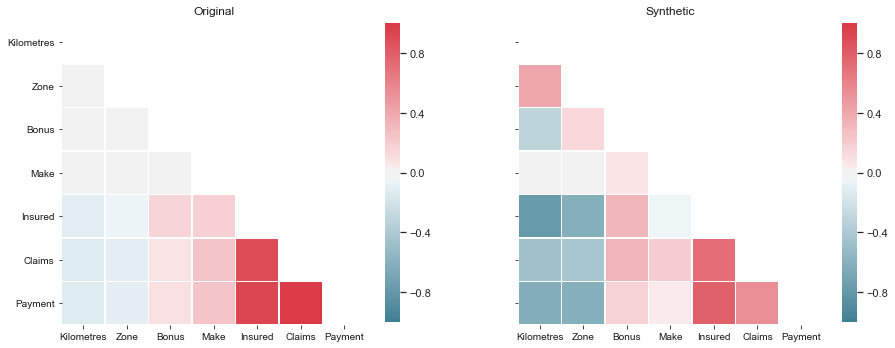

In [12]:
testing.show_corr_matrices()

## Demonstrate the utility for training ML models

One of the use cases 

In [13]:
from sklearn.ensemble import GradientBoostingRegressor
testing.utility(target='Claims', regressor=GradientBoostingRegressor())

RMSE (orig): 17.41304526333704
RMSE (synth): 233.23854272486747


## Final dataset can be released to generate value

In [5]:
synthesized.head(30)

NameError: name 'synthesized' is not defined